In [9]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
#USING COMPOUND NAMES
import pubchempy as pcp
import requests

api_key = '7db66bdc65c444080092a50c128fc3f1b008'

compound_names = ["alpha-Ethyl-3,4,5-trimethoxy-PEA", "4-Allyloxy-3,5-dimethoxy-PEA", "4-Methylthio-2,5-dimethoxy-A"]

# Set up the PubChem API URL
base_url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

smiles_list = []

for compound_name in compound_names:
    try:
        # Build the API request URL
        url = f"{base_url}/compound/name/{compound_name}/property/CanonicalSMILES/JSON"

        # Include the API key in the request headers
        headers = {'apikey': api_key}

        # Make the API request
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()
            smiles = data['PropertyTable']['Properties'][0]['CanonicalSMILES']
            smiles_list.append(smiles)
        else:
            print(f"Error for {compound_name}: {response.status_code}")

    except Exception as e:
        print(f"Error for {compound_name}: {e}")

print(smiles_list)

Error for alpha-Ethyl-3,4,5-trimethoxy-PEA: 404
Error for 4-Allyloxy-3,5-dimethoxy-PEA: 404
Error for 4-Methylthio-2,5-dimethoxy-A: 404
[]


In [2]:
import pubchempy as pcp
import requests

# Replace 'YOUR_API_KEY' with your actual PubChem API key
api_key = '7db66bdc65c444080092a50c128fc3f1b008'

# List of PubChem CIDs for the compounds you want to retrieve SMILES for
cids = [204932, 44719469, 143828]
 
smiles_list = []

for cid in cids:
    try:
        # Build the API request URL
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/JSON"

        # Include the API key in the request headers
        headers = {'apikey': api_key}

        # Make the API request
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()
            smiles = data['PropertyTable']['Properties'][0]['CanonicalSMILES']
            smiles_list.append(smiles)
        else:
            print(f"Error for CID {cid}: {response.status_code}")

    except Exception as e:
        print(f"Error for CID {cid}: {e}")

print(smiles_list)

['CCC(CC1=CC(=C(C(=C1)OC)OC)OC)N', 'COC1=CC(=CC(=C1OCC=C)OC)CCN', 'CC(CC1=CC(=C(C=C1OC)SC)OC)N']


In [16]:
smiles_list


['CCC(CC1=CC(=C(C(=C1)OC)OC)OC)N',
 'C(CC(F)(F)F)C(F)(F)F',
 'CC(C)(C)OC(=O)NCCCCC(C(=O)O)NC(=O)OCC1=CC=CC=C1']

In [55]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 3.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install svgutils


Note: you may need to restart the kernel to use updated packages.


In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from collections import defaultdict
from PIL import Image
import cv2
import numpy as np
from svgutils.compose import Unit, Figure, SVG



# Initialize a list to store images
image_list = []

# Define a default color dictionary with black as the default color
dd = defaultdict(lambda: (0, 0, 0))

for i, smiles in enumerate(smiles_list):
    # Convert SMILES to an RDKit molecule
    mol = Chem.MolFromSmiles(smiles)

    if mol is not None:
        # Generate a 2D drawing of the molecule
        img = Draw.MolToImage(mol, size=(300, 300))

        # Create an RDKit drawing object
        drawer = Draw.MolDraw2DSVG(300, 300)

        # Draw the molecule on the drawing object
        AllChem.Compute2DCoords(mol)  # Compute 2D coordinates (if not already available)
        drawer.DrawMolecule(mol)

        # Finish the drawing
        drawer.FinishDrawing()

        # Get the SVG representation
        svg = drawer.GetDrawingText()

        # Save the SVG to a file
        with open(f"structure_{i}.svg", "w") as svg_file:
            svg_file.write(svg)

        # Read the colored SVG file
        with open(f"structure_{i}.svg", "r") as svg_file:
            colored_svg_data = svg_file.read()

        # Create a new SVG object from the colored SVG data
        colored_svg = SVG(colored_svg_data)

        # Convert the colored SVG to grayscale
        grayscale_svg = colored_svg.to_gray()

        # Save the grayscale SVG to a file
        with open("bw_structure.svg", "w") as bw_svg_file:
            bw_svg_file.write(grayscale_svg.to_str())


OSError: [Errno 63] File name too long: "./<?xml version='1.0' encoding='iso-8859-1'?>\n<svg version='1.1' baseProfile='full'\n              xmlns='http://www.w3.org/2000/svg'\n                      xmlns:rdkit='http://www.rdkit.org/xml'\n                      xmlns:xlink='http://www.w3.org/1999/xlink'\n                  xml:space='preserve'\nwidth='300px' height='300px' viewBox='0 0 300 300'>\n<!-- END OF HEADER -->\n<rect style='opacity:1.0;fill:#FFFFFF;stroke:none' width='300.0' height='300.0' x='0.0' y='0.0'> </rect>\n<path class='bond-0 atom-0 atom-1' d='M 15.0,141.6 L 44.6,166.3' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-1 atom-1 atom-2' d='M 44.6,166.3 L 80.9,152.9' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-2 atom-2 atom-3' d='M 80.9,152.9 L 110.5,177.6' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-3 atom-3 atom-4' d='M 110.5,177.6 L 146.7,164.3' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-4 atom-4 atom-5' d='M 146.7,164.3 L 153.3,126.3' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-4 atom-4 atom-5' d='M 153.0,162.0 L 158.4,130.6' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-5 atom-5 atom-6' d='M 153.3,126.3 L 189.5,113.0' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-6 atom-6 atom-7' d='M 189.5,113.0 L 219.1,137.7' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-6 atom-6 atom-7' d='M 188.4,119.5 L 212.9,140.0' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-7 atom-7 atom-8' d='M 219.1,137.7 L 212.6,175.7' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-8 atom-8 atom-9' d='M 212.6,175.7 L 176.4,189.0' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-8 atom-8 atom-9' d='M 207.4,171.4 L 177.5,182.4' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-9 atom-8 atom-10' d='M 212.6,175.7 L 224.3,185.4' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-9 atom-8 atom-10' d='M 224.3,185.4 L 235.9,195.1' style='fill:none;fill-rule:evenodd;stroke:#FF0000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-10 atom-10 atom-11' d='M 241.0,207.3 L 238.3,222.9' style='fill:none;fill-rule:evenodd;stroke:#FF0000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-10 atom-10 atom-11' d='M 238.3,222.9 L 235.7,238.4' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-11 atom-7 atom-12' d='M 219.1,137.7 L 234.1,132.1' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-11 atom-7 atom-12' d='M 234.1,132.1 L 249.1,126.6' style='fill:none;fill-rule:evenodd;stroke:#FF0000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-12 atom-12 atom-13' d='M 261.6,129.6 L 273.3,139.3' style='fill:none;fill-rule:evenodd;stroke:#FF0000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-12 atom-12 atom-13' d='M 273.3,139.3 L 285.0,149.0' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-13 atom-6 atom-14' d='M 189.5,113.0 L 192.2,97.4' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-13 atom-6 atom-14' d='M 192.2,97.4 L 194.9,81.9' style='fill:none;fill-rule:evenodd;stroke:#FF0000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-14 atom-14 atom-15' d='M 202.4,72.6 L 217.3,67.1' style='fill:none;fill-rule:evenodd;stroke:#FF0000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-14 atom-14 atom-15' d='M 217.3,67.1 L 232.3,61.6' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-15 atom-2 atom-16' d='M 80.9,152.9 L 83.6,137.3' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-15 atom-2 atom-16' d='M 83.6,137.3 L 86.3,121.6' style='fill:none;fill-rule:evenodd;stroke:#0000FF;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path class='bond-16 atom-9 atom-4' d='M 176.4,189.0 L 146.7,164.3' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path d='M 43.2,165.0 L 44.6,166.3 L 46.5,165.6' style='fill:none;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;' />\n<path d='M 109.0,176.4 L 110.5,177.6 L 112.3,177.0' style='fill:none;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;' />\n<path d='M 153.0,128.2 L 153.3,126.3 L 155.1,125.6' style='fill:none;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;' />\n<path d='M 178.2,188.3 L 176.4,189.0 L 174.9,187.8' style='fill:none;stroke:#000000;stroke-width:2.0px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1;' />\n<path class='atom-10' d='M 237.2 200.4\nQ 237.2 197.8, 238.5 196.3\nQ 239.8 194.8, 242.2 194.8\nQ 244.6 194.8, 245.9 196.3\nQ 247.2 197.8, 247.2 200.4\nQ 247.2 203.1, 245.9 204.6\nQ 244.6 206.1, 242.2 206.1\nQ 239.8 206.1, 238.5 204.6\nQ 237.2 203.1, 237.2 200.4\nM 242.2 204.8\nQ 243.9 204.8, 244.8 203.7\nQ 245.7 202.6, 245.7 200.4\nQ 245.7 198.3, 244.8 197.2\nQ 243.9 196.1, 242.2 196.1\nQ 240.6 196.1, 239.6 197.2\nQ 238.7 198.2, 238.7 200.4\nQ 238.7 202.6, 239.6 203.7\nQ 240.6 204.8, 242.2 204.8\n' fill='#FF0000'/>\n<path class='atom-12' d='M 250.3 124.4\nQ 250.3 121.7, 251.6 120.3\nQ 252.9 118.8, 255.4 118.8\nQ 257.8 118.8, 259.1 120.3\nQ 260.4 121.7, 260.4 124.4\nQ 260.4 127.0, 259.1 128.5\nQ 257.7 130.0, 255.4 130.0\nQ 252.9 130.0, 251.6 128.5\nQ 250.3 127.0, 250.3 124.4\nM 255.4 128.8\nQ 257.0 128.8, 257.9 127.7\nQ 258.8 126.5, 258.8 124.4\nQ 258.8 122.2, 257.9 121.1\nQ 257.0 120.0, 255.4 120.0\nQ 253.7 120.0, 252.8 121.1\nQ 251.9 122.2, 251.9 124.4\nQ 251.9 126.6, 252.8 127.7\nQ 253.7 128.8, 255.4 128.8\n' fill='#FF0000'/>\n<path class='atom-14' d='M 191.0 75.0\nQ 191.0 72.3, 192.3 70.9\nQ 193.6 69.4, 196.1 69.4\nQ 198.5 69.4, 199.8 70.9\nQ 201.1 72.3, 201.1 75.0\nQ 201.1 77.6, 199.8 79.1\nQ 198.5 80.6, 196.1 80.6\nQ 193.7 80.6, 192.3 79.1\nQ 191.0 77.6, 191.0 75.0\nM 196.1 79.4\nQ 197.7 79.4, 198.6 78.3\nQ 199.5 77.2, 199.5 75.0\nQ 199.5 72.8, 198.6 71.7\nQ 197.7 70.6, 196.1 70.6\nQ 194.4 70.6, 193.5 71.7\nQ 192.6 72.8, 192.6 75.0\nQ 192.6 77.2, 193.5 78.3\nQ 194.4 79.4, 196.1 79.4\n' fill='#FF0000'/>\n<path class='atom-16' d='M 85.0 109.4\nL 88.6 115.2\nQ 88.9 115.8, 89.5 116.8\nQ 90.1 117.9, 90.1 117.9\nL 90.1 109.4\nL 91.6 109.4\nL 91.6 120.4\nL 90.1 120.4\nL 86.2 114.0\nQ 85.8 113.3, 85.3 112.4\nQ 84.8 111.6, 84.7 111.3\nL 84.7 120.4\nL 83.3 120.4\nL 83.3 109.4\nL 85.0 109.4\n' fill='#0000FF'/>\n<path class='atom-16' d='M 93.7 109.4\nL 95.1 109.4\nL 95.1 114.1\nL 100.7 114.1\nL 100.7 109.4\nL 102.2 109.4\nL 102.2 120.4\nL 100.7 120.4\nL 100.7 115.3\nL 95.1 115.3\nL 95.1 120.4\nL 93.7 120.4\nL 93.7 109.4\n' fill='#0000FF'/>\n<path class='atom-16' d='M 104.3 120.0\nQ 104.6 119.3, 105.2 118.9\nQ 105.9 118.5, 106.8 118.5\nQ 107.8 118.5, 108.5 119.1\nQ 109.1 119.7, 109.1 120.8\nQ 109.1 121.8, 108.3 122.8\nQ 107.5 123.8, 105.9 125.0\nL 109.2 125.0\nL 109.2 125.8\nL 104.3 125.8\nL 104.3 125.1\nQ 105.7 124.2, 106.5 123.5\nQ 107.3 122.8, 107.7 122.1\nQ 108.0 121.5, 108.0 120.8\nQ 108.0 120.1, 107.7 119.7\nQ 107.4 119.4, 106.8 119.4\nQ 106.2 119.4, 105.8 119.6\nQ 105.4 119.8, 105.1 120.3\nL 104.3 120.0\n' fill='#0000FF'/>\n</svg>\n"

In [8]:
#TANIMOTO COEFFICIENTS

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import pandas as pd

# Create a function to calculate Tanimoto coefficients
def calculate_tanimoto(smiles1, smiles2):
    molecule1 = Chem.MolFromSmiles(smiles1)
    molecule2 = Chem.MolFromSmiles(smiles2)
    if molecule1 is not None and molecule2 is not None:
        fingerprint1 = AllChem.GetMorganFingerprintAsBitVect(molecule1, 2)
        fingerprint2 = AllChem.GetMorganFingerprintAsBitVect(molecule2, 2)
        return DataStructs.TanimotoSimilarity(fingerprint1, fingerprint2)
    else:
        return None

# Create a similarity matrix
num_structures = len(smiles_list)
similarity_matrix = [[0.0 for _ in range(num_structures)] for _ in range(num_structures)]

for i in range(num_structures):
    for j in range(i, num_structures):
        if i == j:
            similarity_matrix[i][j] = 1.0
        else:
            tanimoto = calculate_tanimoto(smiles_list[i], smiles_list[j])
            if tanimoto is not None:
                similarity_matrix[i][j] = similarity_matrix[j][i] = tanimoto

# Create a DataFrame for the similarity matrix
columns = [f"Structure_{i+1}" for i in range(num_structures)]
df_similarity = pd.DataFrame(similarity_matrix, columns=columns, index=columns)

# Display the similarity matrix
print(df_similarity)

# Save the similarity matrix to a CSV file
df_similarity.to_csv("similarity_matrix.csv")

             Structure_1  Structure_2  Structure_3
Structure_1     1.000000     0.348837     0.325581
Structure_2     0.348837     1.000000     0.220000
Structure_3     0.325581     0.220000     1.000000


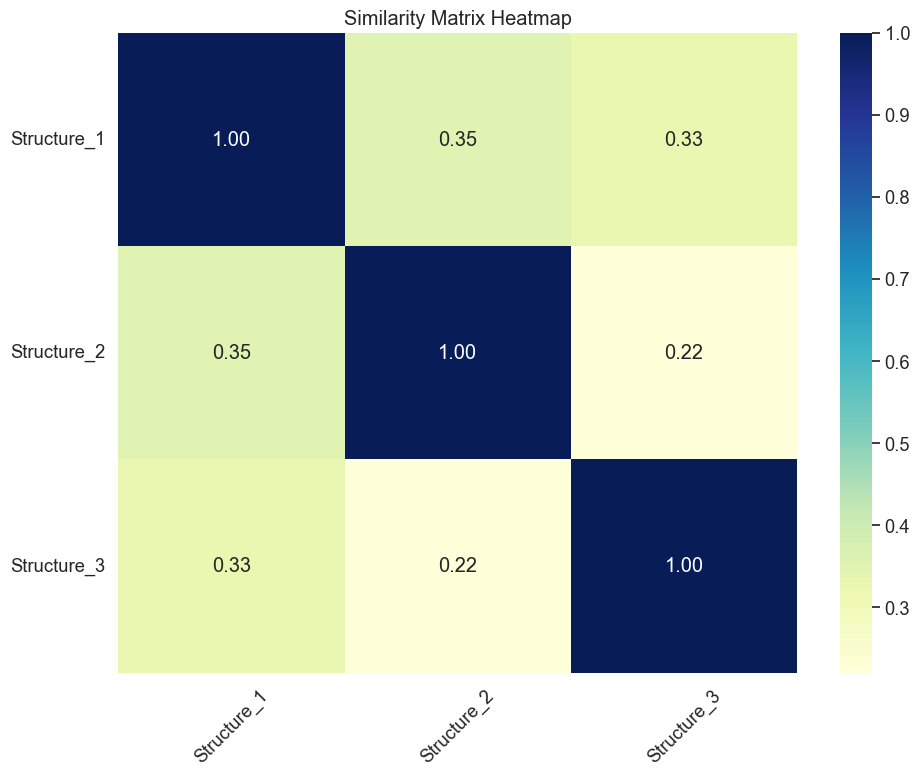

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Previous code to calculate similarity_matrix) ...

# Create a DataFrame for the similarity matrix
columns = [f"Structure_{i+1}" for i in range(num_structures)]
df_similarity = pd.DataFrame(similarity_matrix, columns=columns, index=columns)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust the font size as needed

# You can customize the colormap by specifying 'cmap' parameter (e.g., cmap="YlGnBu")
heatmap = sns.heatmap(df_similarity, annot=True, fmt=".2f", cmap="YlGnBu")

# Customize the appearance (optional)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title("Similarity Matrix Heatmap")
plt.tight_layout()

# Show the heatmap
plt.show()

In [25]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Load a molecule from a SMILES string
smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
mol = Chem.MolFromSmiles(smiles)

# Generate the molecule with thick red lines along the bonds of the benzene ring
mol = AllChem.MolFromSmiles(smiles)
highlight_atoms = mol.GetSubstructMatch(Chem.MolFromSmarts("c1ccccc1"))
highlight_bonds = []

for atom_idx in highlight_atoms:
    atom = mol.GetAtomWithIdx(atom_idx)
    for bond in atom.GetBonds():
        other_atom = bond.GetOtherAtom(atom)
        if other_atom.GetIdx() in highlight_atoms:
            highlight_bonds.append(bond.GetIdx())

img = Draw.MolToImage(mol, size=(300, 300), wedgeBonds=True, kekulize=True, highlightBonds=highlight_bonds, bondLineWidth=2.0, useSVG=True)

# Display the image with the highlighted benzene ring
img.show()

In [43]:
pip install svgwrite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import svgwrite
import io
import base64

# Load a molecule from a SMILES string
smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
mol = Chem.MolFromSmiles(smiles)

# Generate a 2D depiction with RDKit
img = Draw.MolToImage(mol, size=(300, 300), kekulize=True)

# Convert the image to a black-and-white format with only the oxygen atom being black
img = img.convert("L")

# Create an SVG container
dwg = svgwrite.Drawing("black_structure.svg", profile='tiny', size=(300, 300))

# Convert the PIL image to bytes
output = io.BytesIO()
img.save(output, format='PNG')
data_uri = "data:image/png;base64," + base64.b64encode(output.getvalue()).decode()

# Embed the PNG image in the SVG
dwg.add(dwg.image(href=data_uri, size=(300, 300)))

# Save the SVG file
dwg.save()

# HANNAH WORK

In [4]:
pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=2b9724a068ad18ed72e4ab384ab3eb45a41c66ab1b1b6b6462e660dbe363a61b
  Stored in directory: /Users/hannah/Library/Caches/pip/wheels/84/45/0e/b597debba098119b642eaf728ae1883d23ad8ea2a9366f2ded
Successfully built pubchempy
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pubchempy as pcp
import requests
import csv

# Replace 'YOUR_API_KEY' with your actual PubChem API key
api_key = '7db66bdc65c444080092a50c128fc3f1b008'

# Read CIDs from a .csv file and store them in a list
cids = []
with open('/Users/hannah/Desktop/shulginclassification.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        cids.extend(row)

smiles_list = []

for cid in cids:
    try:
        # Build the API request URL
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/JSON"

        # Include the API key in the request headers
        headers = {'apikey': api_key}

        # Make the API request
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()
            smiles = data['PropertyTable']['Properties'][0]['CanonicalSMILES']
            smiles_list.append(smiles)
        else:
            print(f"Error for CID {cid}: {response.status_code}")

    except Exception as e:
        print(f"Error for CID {cid}: {e}")

print(smiles_list)

In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PubChem

# Read CID data from CSV file (assuming CIDs are in the second column)
cid_df = pd.read_csv('/Users/hannah/Desktop/shulginclassification.csv', usecols=[1], header=None, names=['CID'])

def cid_to_smiles(cid):
    try:
        compound = PubChem.Compound.from_cid(cid)
        smiles = compound.canonical_smiles
        return smiles
    except Exception as e:
        print(f"Error processing CID {cid}: {e}")
        return None

# Apply the function to the 'CID' column and create a new column 'SMILES'
cid_df['SMILES'] = cid_df['CID'].apply(cid_to_smiles)

# Save the DataFrame with SMILES information to a new CSV file
cid_df.to_csv('output_file.csv', index=False)


ImportError: cannot import name 'PubChem' from 'rdkit.Chem' (/Users/hannah/anaconda3/envs/pikachu/lib/python3.9/site-packages/rdkit/Chem/__init__.py)

In [3]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 13.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from rdkit import Chem

# Read CID data from CSV file (assuming CIDs are in the second column)
cid_df = pd.read_csv('/Users/hannah/Desktop/shulginclassification.csv', usecols=[1], header=None, names=['CID'])

def cid_to_smiles(cid):
    try:
        mol = Chem.MolFromSmiles(Chem.MolToSmiles(Chem.MolFromSmiles(cid)))
        if mol:
            smiles = Chem.MolToSmiles(mol)
            return smiles
        else:
            print(f"Invalid SMILES string for CID {cid}")
            return None
    except Exception as e:
        print(f"Error processing CID {cid}: {e}")
        return None

# Apply the function to the 'CID' column and create a new column 'SMILES'
cid_df['SMILES'] = cid_df['CID'].apply(cid_to_smiles)

# Save the DataFrame with SMILES information to a new CSV file
cid_df.to_csv('/Users/hannah/Desktop/output_file.csv', index=False)

[15:05:49] SMILES Parse Error: syntax error while parsing: Pubchem
[15:05:49] SMILES Parse Error: Failed parsing SMILES 'Pubchem' for input: 'Pubchem'
[15:05:49] SMILES Parse Error: syntax error while parsing: 204932
[15:05:49] SMILES Parse Error: Failed parsing SMILES '204932' for input: '204932'
[15:05:49] SMILES Parse Error: syntax error while parsing: 44719469
[15:05:49] SMILES Parse Error: Failed parsing SMILES '44719469' for input: '44719469'
[15:05:49] SMILES Parse Error: syntax error while parsing: 143828
[15:05:49] SMILES Parse Error: Failed parsing SMILES '143828' for input: '143828'
[15:05:49] SMILES Parse Error: syntax error while parsing: 10264356
[15:05:49] SMILES Parse Error: Failed parsing SMILES '10264356' for input: '10264356'
[15:05:49] SMILES Parse Error: syntax error while parsing: 44350301
[15:05:49] SMILES Parse Error: Failed parsing SMILES '44350301' for input: '44350301'
[15:05:49] SMILES Parse Error: syntax error while parsing: 44719475
[15:05:49] SMILES Parse

Error processing CID Pubchem ID: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)
Error processing CID 204932: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)
Error processing CID 44719469: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, b

[15:05:49] SMILES Parse Error: syntax error while parsing: 6091
[15:05:49] SMILES Parse Error: Failed parsing SMILES '6091' for input: '6091'
[15:05:49] SMILES Parse Error: syntax error while parsing: 44719455
[15:05:49] SMILES Parse Error: Failed parsing SMILES '44719455' for input: '44719455'
[15:05:49] SMILES Parse Error: syntax error while parsing: 8367
[15:05:49] SMILES Parse Error: Failed parsing SMILES '8367' for input: '8367'
[15:05:49] SMILES Parse Error: syntax error while parsing: 44457783
[15:05:49] SMILES Parse Error: Failed parsing SMILES '44457783' for input: '44457783'
[15:05:49] SMILES Parse Error: syntax error while parsing: 5280951
[15:05:49] SMILES Parse Error: Failed parsing SMILES '5280951' for input: '5280951'
[15:05:49] SMILES Parse Error: syntax error while parsing: 5280953
[15:05:49] SMILES Parse Error: Failed parsing SMILES '5280953' for input: '5280953'
[15:05:49] SMILES Parse Error: syntax error while parsing: 21854224
[15:05:49] SMILES Parse Error: Failed 

In [7]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import PubChem

ImportError: cannot import name 'PubChem' from 'rdkit.Chem' (/Users/hannah/anaconda3/envs/pikachu/lib/python3.9/site-packages/rdkit/Chem/__init__.py)

In [8]:
pip install PubChemPy


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pubchempy as pcp

# Read CID data from CSV file (assuming the 'CID' column contains PubChem CIDs)
cid_df = pd.read_csv('/Users/hannah/Desktop/CID.csv')

def cid_to_smiles(cid):
    try:
        compound = pcp.Compound.from_cid(cid)
        smiles = compound.isomeric_smiles
        return smiles
    except Exception as e:
        print(f"Error processing CID {cid}: {e}")
        return None

# Apply the function to the 'CID' column and create a new column 'SMILES'
cid_df['SMILES'] = cid_df['CID'].apply(cid_to_smiles)

# Save the DataFrame with SMILES information to a new CSV file
cid_df.to_csv('/Users/hannah/Desktop/smiles.csv', index=False)
